<a href="https://colab.research.google.com/github/ephantus9/ephantuswa/blob/main/Neural_network1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [25]:
pip install -q tensorflow tensorflow-datasets

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
tfds.disable_progress_bar()

Find Datasets


In [27]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

## Get information on the data`

In [28]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock

## Prepare Rock Paper scissors Data


In [29]:
ds_train = tfds.load(name='rock_paper_scissors', split='train')
ds_test = tfds.load(name='rock_paper_scissors', split='test')

## Show examples

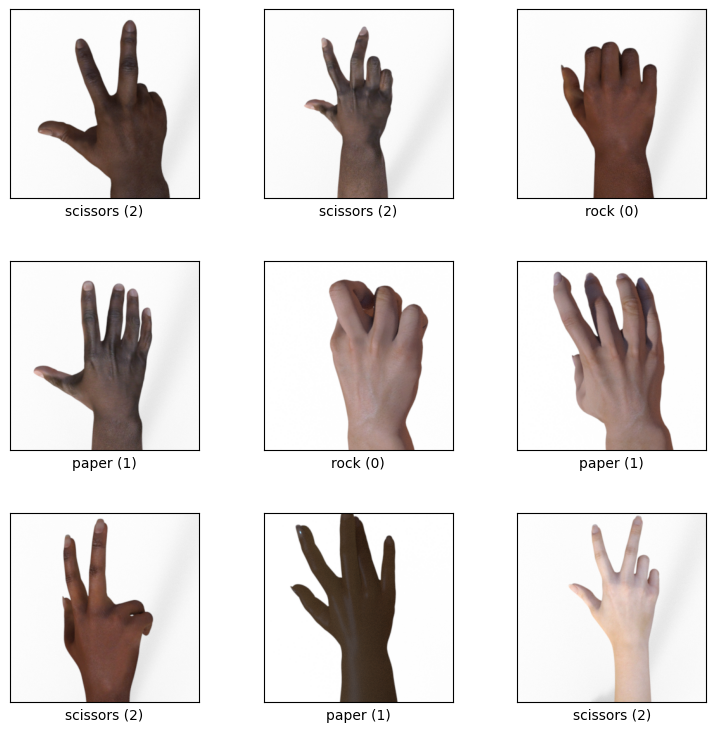

In [30]:
fig = tfds.show_examples(ds_train, info)

## Additional data Prep

In [31]:
train_images = np.array([example['image'].numpy()[:,:,0]for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0]for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [32]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images/=225
test_images /=225

In [33]:
train_images[0].shape

(300, 300, 1)

In [34]:
type(train_images[0])
train_images.shape

(2520, 300, 300, 1)

##Train a network(basic approach)

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation ='relu'),
    keras.layers.Dense(256, activation ='relu'),
    keras.layers.Dense(3, activation='softmax')

  ])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3720 - loss: 39.3707
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6282 - loss: 2.7643
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6494 - loss: 2.1506
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8160 - loss: 0.6422
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7755 - loss: 0.9516


In [36]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5199 - loss: 2.7712


[2.9673726558685303, 0.5]

##Train a network (convolutional approach)

In [37]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.5490 - loss: 8.7914
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9495 - loss: 0.2817
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.9397 - loss: 0.2258
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 1.0000 - loss: 0.0108
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 1.0000 - loss: 0.0042


In [38]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6169 - loss: 1.0955


[1.1090259552001953, 0.6182795763015747]

## A better convolutional Network

In [39]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    keras.layers.Dense(512, activation ='relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')

])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.3778 - loss: 1.7140
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.7604 - loss: 0.5856
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9636 - loss: 0.1392
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9917 - loss: 0.0298
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9980 - loss: 0.0143


In [40]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6632 - loss: 1.3923


[1.5632619857788086, 0.6451612710952759]

## Hyperperameter turning

In [41]:
pip install -U keras-tuner

In [ ]:
from kerastuner.tuners import RandomSearch
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1))),

  model.add(keras.layers.Dense(512, activation ='relu'))
  model.add(keras.layers.Dense(256, activation = 'relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice('Dense layer', [64,128,256,512,1024]), activation='relu'))
  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
      build_model,
      objective='val_accuracy',
      max_trials=5,

  )

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 1 Complete [00h 01m 49s]
val_accuracy: 0.698924720287323

Best val_accuracy So Far: 0.698924720287323
Total elapsed time: 00h 01m 49s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
512               |128               |Dense layer

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.4208 - loss: 5.3502

In [42]:
from kerastuner.tuners import RandomSearch
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1))),

  for i in range(hp.Int('Conv Layers', min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f'layers_{i}_filters',[16,32,64]), 3, activation='relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice('Dense layer', [64,128,256,512,1024]), activation='relu'))
  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
      build_model,
      objective='val_accuracy',
      max_trials=5,

  )

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Reloading Tuner from ./untitled_project/tuner0.json


In [43]:
best_model = tuner.get_best_models()[0]


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [44]:
best_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8319 - loss: 0.5489


[0.5624736547470093, 0.8172042965888977]

In [45]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ average_pooling2d               │ (None, 99, 99, 1)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 97, 97, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,876,579 (72.01 MB)

 Trainable params: 18,876,579 (72.01 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
Conv Layers: 1
Dense layer: 512
layers_0_filters: 16
layers_1_filters: 32
layers_2_filters: 16
Score: 0.8172042965888977

Trial 2 summary
Hyperparameters:
Conv Layers: 1
Dense layer: 512
layers_0_filters: 32
layers_1_filters: 32
layers_2_filters: 64
Score: 0.7822580933570862

Trial 0 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 128
layers_0_filters: 16
layers_1_filters: 16
layers_2_filters: 16
Score: 0.7284946441650391

Trial 4 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 1024
layers_0_filters: 32
layers_1_filters: 16
layers_2_filters: 32
Score: 0.6048387289047241

Trial 1 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 1024
layers_0_filters: 64
layers_1_filters: 16
layers_2_filters: 32
Score: 0.5752688050270081


## Save & load our models

In [47]:
best_model.save('./my_model.h5')

In [49]:
loaded_model = keras.models.load_model('./my_model.h5')

In [50]:
loaded_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8319 - loss: 0.5489


[0.5624736547470093, 0.8172042965888977]

plot image from Numpy Array

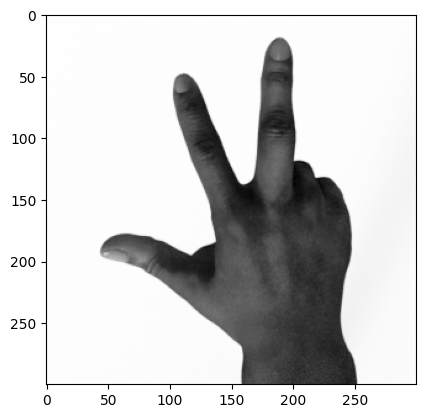

In [53]:
rgb_image=np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_image[0]

image=train_images[0].reshape(300,300)
plt.imshow(train_images[0],cmap='Greys_r')

## Convert PNG/JPG images to numpy format

/tmp/ipython-input-95601255.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im=imageio.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRu5bcvV6CcSgBJJttfFwBm5i8ZNZ2HlAHN5Q&s')


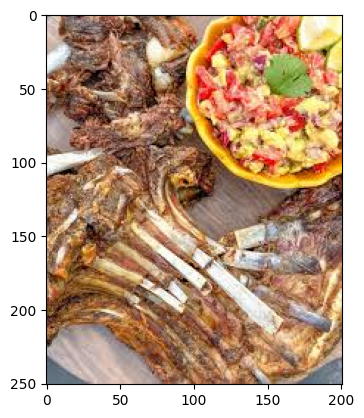

In [57]:
import imageio

im=imageio.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRu5bcvV6CcSgBJJttfFwBm5i8ZNZ2HlAHN5Q&s')

plt.imshow(im)

In [58]:
print(type(im))
im_np = np.asarray(im)

<class 'numpy.ndarray'>


In [59]:
print(im_np.shape)

(251, 201, 3)
